In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hayde\Downloads\College_Data (1).csv")
x = df[ ["PhD", "S.F.Ratio", "Room.Board", "Books", "Outstate", "Accept"] ]
y = df[['Grad.Rate']]

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


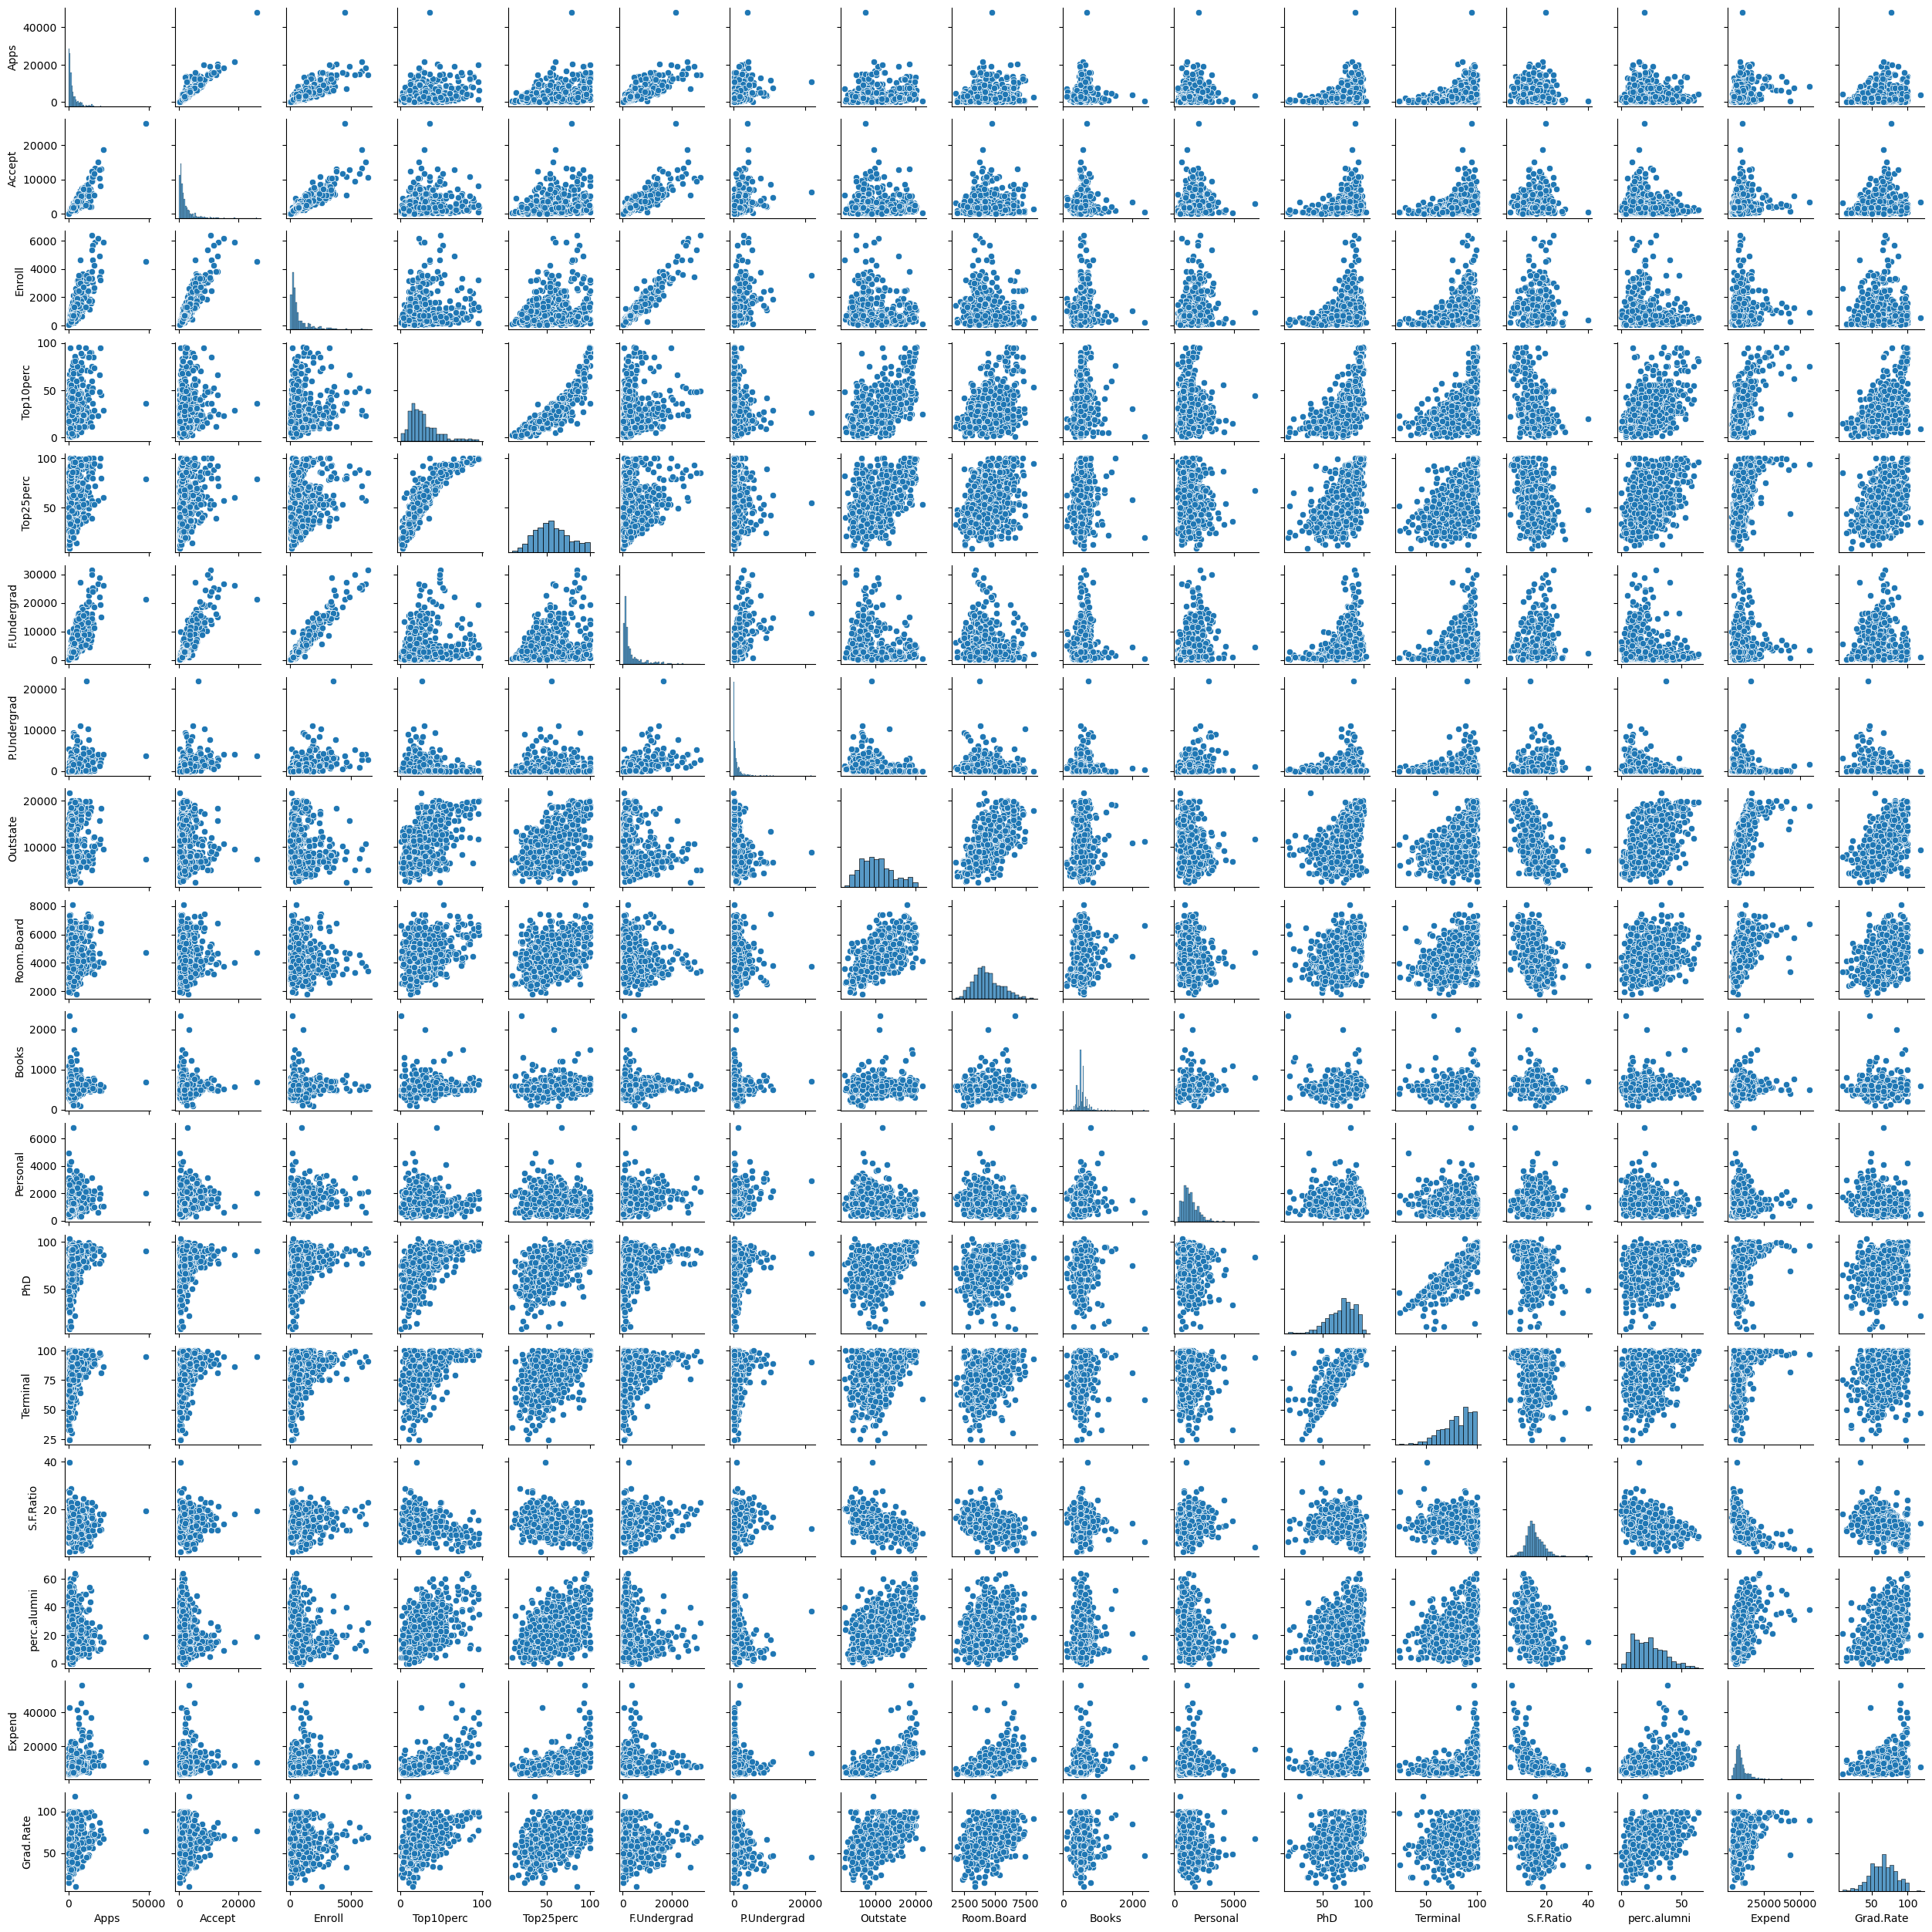

In [27]:
sns.pairplot(df, height=1.5)
plt.show()

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns

vif_data["VIF"] = [ variance_inflation_factor(x.values ,i) for i in range(x.shape[1] )  ]
vif_data

,Feature,VIF
0,PhD,24.501079
1,S.F.Ratio,10.593691
2,Room.Board,28.118231
3,Books,10.811540
4,Outstate,17.671817
5,Accept,1.957578


In [9]:
y

,Grad.Rate
0,60
1,56
2,54
3,59
4,15
...,...
772,40
773,83
774,49
775,99


In [11]:
import statsmodels.api as sm

model_formula = sm.OLS(y,x)
result = model_formula.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Grad.Rate   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              2674.
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                        0.00
Time:                        15:29:31   Log-Likelihood:                         -3179.9
No. Observations:                 777   AIC:                                      6372.
Df Residuals:                     771   BIC:                                      6400.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PhD            0.1921      0.035      5.538      0.000       0.124       0.260
S.F.Ratio      0.8353      0.116      7.196      0.000       0.607       1.063
Room.Board     0.0026      0.001      4.208      0.000       0.001       0.004
Books          0.0053      0.003      1.762      0.079      -0.001       0.011
Outstate       0.0024      0.000     12.358      0.000       0.002       0.003
Accept        -0.0001      0.000     -0.473      0.637      -0.001       0.000
==============================================================================
Omnibus:                       24.959   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.764
Skew:                           0.271   Prob(JB):                     3.82e-09
Kurtosis:                       3.951   Cond. No.                     2.74e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

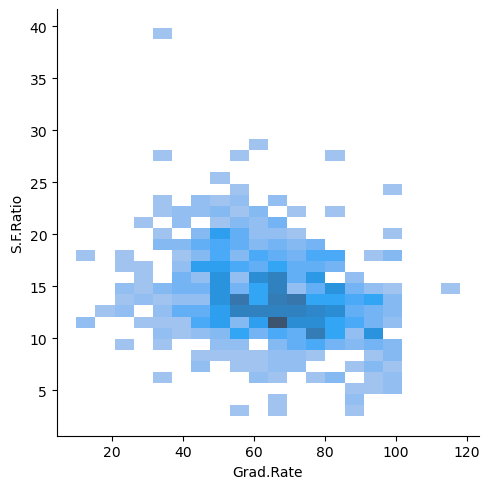

In [23]:
sns.displot(x="Grad.Rate", y="S.F.Ratio", data=df)

<Axes: xlabel='Private', ylabel='Grad.Rate'>

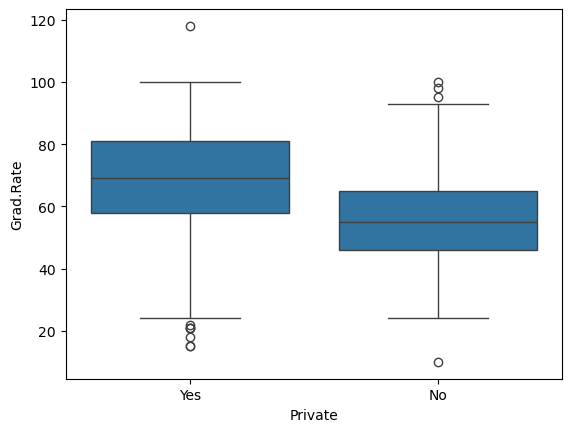

In [28]:
sns.boxplot(x="Private", y="Grad.Rate", data=df)

<Axes: xlabel='S.F.Ratio', ylabel='PhD'>

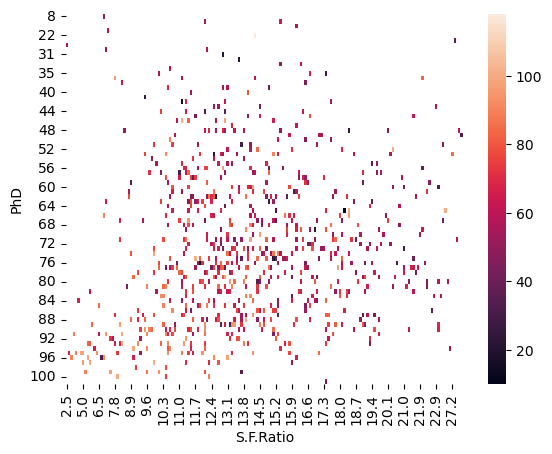

In [42]:
test = df.pivot_table(index="PhD", columns="S.F.Ratio", values="Grad.Rate")
sns.heatmap(test)